# **GR5242 HW5**
## **Zihan Zhou (zz2573)**

# **1. Gridworld value**

## **(a)**

In [0]:
def value(gamma = 0.9, location = 0, depth = 0, depth_limit = 200):
  if depth > depth_limit:
    return (10 if location == 0 else 0)
  else:
    if location == 0: # at A, accruing reward = 10
      return (10 + gamma * value(gamma, 4, depth+1)) # jump to A' (location = 4) 
    else:
      return (0 + gamma * value(gamma, location-1, depth+1)) # move upwards

In [2]:
reward = value()
print('######## Value function at state A: %.4f' % reward, ' ########')

######## Value function at state A: 24.4194  ########


## **(b)**
Denote the three grids between $A$ and $A'$ as $A_1,A_2,A_3$. Then we have

\begin{align*}
v_*(s=A) &= 10 + 0.9v_*(s=A') \\
&= 10 + 0.9(0 + 0.9v_*(s=A_3)) \\
&= 10 + 0.9^2v_*(s=A_3) \\
&= 10 + 0.9^3v_*(s=A_2) \\
&= 10 + 0.9^4v_*(s=A_1) \\
&= 10 + 0.9^5v_*(s=A)
\end{align*}

$$ \Rightarrow v_*(s=A) = \frac{10}{1-0.9^5} \approx 24.4$$

## **(c)**
Since the optimal policy is to approach $A$ wherever you are, these different values correspond to the distance between current grid and $A$. For example, $v_*(s)=22.0$ if and only if $s$ is one step away from $A$, $v_*(s)=19.8$ if and only if $s$ is two steps away from $A$, etc.

Mathematically, if $s$ is $k$ steps away from $A$, $v_*(s) = 0.9^kv_*(s=A)$, since it takes $k$ steps to get to $A$, and each step accruing zero rewards.

# **2. Text Classification with an RNN**

## **(a)**
The following codes are from [Tensorflow's tutorial](https://www.tensorflow.org/tutorials/text/text_classification_rnn).

## Setup

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow_datasets as tfds
import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string], '')
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

## Setup input pipeline

In [5]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/0.1.0. Subsequent calls will reuse this data.


In [0]:
encoder = info.features['text'].encoder

In [7]:
print ('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


In [8]:
sample_string = 'Hello TensorFlow.'

encoded_string = encoder.encode(sample_string)
print ('Encoded string is {}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print ('The original string: "{}"'.format(original_string))

Encoded string is [4025, 222, 6307, 2327, 4043, 2120, 7975]
The original string: "Hello TensorFlow."


In [0]:
assert original_string == sample_string

In [10]:
for index in encoded_string:
  print ('{} ----> {}'.format(index, encoder.decode([index])))

4025 ----> Hell
222 ----> o 
6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
7975 ----> .


## Prepare the data for training

In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [0]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)

test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

## Create the model

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

## Train the model

In [15]:
history = model.fit(train_dataset, epochs=5,
                    validation_data=test_dataset, 
                    validation_steps=30)

Epoch 1/5
391/391 [==============================] - 54s 138ms/step - loss: 0.6492 - accuracy: 0.5939 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
391/391 [==============================] - 47s 121ms/step - loss: 0.3611 - accuracy: 0.8529 - val_loss: 0.3458 - val_accuracy: 0.8594
Epoch 3/5
391/391 [==============================] - 49s 125ms/step - loss: 0.2590 - accuracy: 0.9042 - val_loss: 0.3084 - val_accuracy: 0.8714
Epoch 4/5
391/391 [==============================] - 49s 124ms/step - loss: 0.2131 - accuracy: 0.9251 - val_loss: 0.3031 - val_accuracy: 0.8734
Epoch 5/5
391/391 [==============================] - 48s 122ms/step - loss: 0.1861 - accuracy: 0.9364 - val_loss: 0.3350 - val_accuracy: 0.8766


In [16]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 18s 47ms/step - loss: 0.3596 - accuracy: 0.8671
Test Loss: 0.35963416659771025
Test Accuracy: 0.8670799732208252


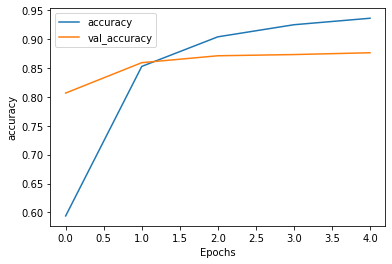

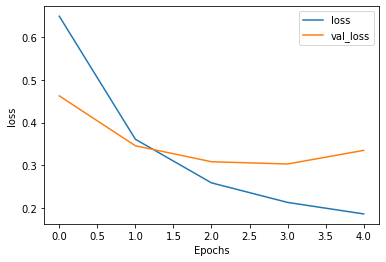

In [17]:
plot_graphs(history,'accuracy')
plot_graphs(history,'loss')

## **(b)**

In [0]:
def sample_predict(sentence):
  encoded_sample_pred_text = encoder.encode(sentence)
  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))
  return (predictions)

In [19]:
positive_review = ('What an awesome movie! Great performance by the actors. Absolutely recommend!')
negative_review = ('Worst movie I have ever watched. Totally a waste of time!')

print(sample_predict(positive_review))
print(sample_predict(negative_review))



[[0.64354444]]
[[0.26218128]]


The prediction values we get corresponding to positive and negative reviews are both accurate.

## **(c)**
The embedding layer converts the sequences of word indices to sequences of vectors, which is way more efficient for training than one-hot encoding, since the size of vocabularies is normally large.

## **(d) Customized model**
First I remove the bidirectional wrapper to see how the result would be only considering backward states.

In [0]:
unidirectional_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
unidirectional_model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [22]:
uni_history = unidirectional_model.fit(train_dataset, epochs=5,
                    validation_data=test_dataset, 
                    validation_steps=30)

Epoch 1/5
391/391 [==============================] - 32s 81ms/step - loss: 0.6932 - accuracy: 0.4979 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
391/391 [==============================] - 29s 75ms/step - loss: 0.6931 - accuracy: 0.4970 - val_loss: 0.6931 - val_accuracy: 0.5109
Epoch 3/5
391/391 [==============================] - 30s 76ms/step - loss: 0.6931 - accuracy: 0.4998 - val_loss: 0.6932 - val_accuracy: 0.4896
Epoch 4/5
391/391 [==============================] - 29s 75ms/step - loss: 0.6929 - accuracy: 0.5024 - val_loss: 0.6932 - val_accuracy: 0.5109
Epoch 5/5
391/391 [==============================] - 30s 77ms/step - loss: 0.6928 - accuracy: 0.4967 - val_loss: 0.6935 - val_accuracy: 0.5104


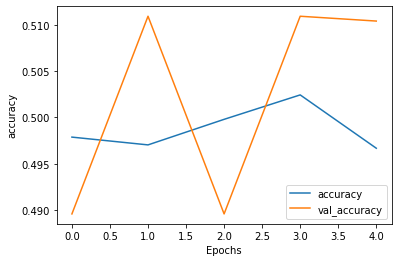

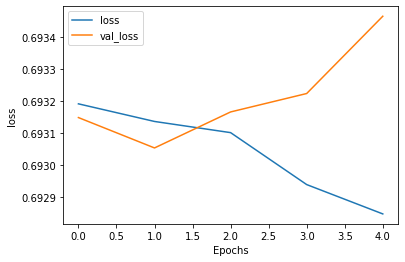

In [23]:
plot_graphs(uni_history,'accuracy')
plot_graphs(uni_history,'loss')

We can see that the performance is way worse and less stable than bidirectional model.

Next I try to modify some parameters based on the bidirectional model.

In [0]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    # add one fully connected layer
    tf.keras.layers.Dropout(0.2),
    # add one dropout layer for generalization
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model_1.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [43]:
history_1 = model_1.fit(train_dataset, epochs=5,
                    validation_data=test_dataset, 
                    validation_steps=30)

Epoch 1/5
391/391 [==============================] - 51s 132ms/step - loss: 0.6369 - accuracy: 0.6121 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
391/391 [==============================] - 48s 123ms/step - loss: 0.3538 - accuracy: 0.8600 - val_loss: 0.3392 - val_accuracy: 0.8547
Epoch 3/5
391/391 [==============================] - 48s 123ms/step - loss: 0.2549 - accuracy: 0.9072 - val_loss: 0.3190 - val_accuracy: 0.8594
Epoch 4/5
391/391 [==============================] - 48s 124ms/step - loss: 0.2136 - accuracy: 0.9253 - val_loss: 0.3201 - val_accuracy: 0.8625
Epoch 5/5
391/391 [==============================] - 48s 124ms/step - loss: 0.1837 - accuracy: 0.9395 - val_loss: 0.3380 - val_accuracy: 0.8635


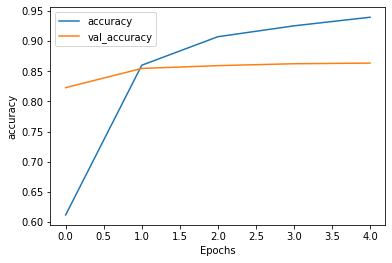

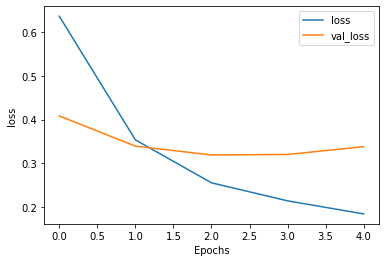

In [44]:
plot_graphs(history_1,'accuracy')
plot_graphs(history_1,'loss')

The performance achieved is similar to the original model.